# Non-Linear Regression

## 1. Import Libraries

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

## 2. Load Data

In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv'
df = pd.read_csv(path)

df.head(10)


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Data Set

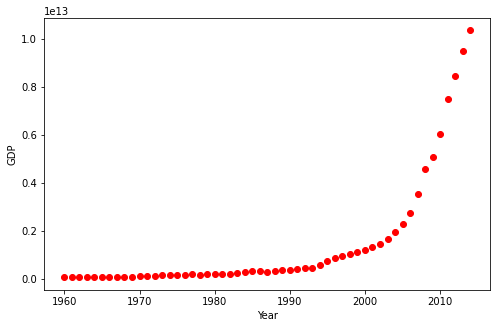

In [27]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Normalize

In [28]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

## 3. Split Data Into Training & Test
80% Training, 20% Test

In [29]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

Training Set

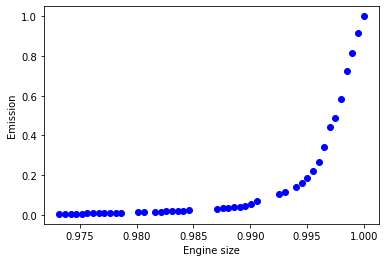

In [30]:
plt.scatter(train_x, train_y,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Test Set

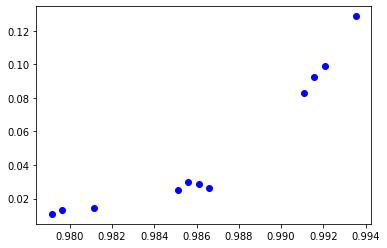

In [31]:
plt.scatter(test_x, test_y, color='blue')
plt.show()

## 4. Algorithm

Non-Linear Regression

$$
\hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}
$$
β_1: Controls the curve's steepness,

β_2: Slides the curve on the x-axis.

In [32]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

## 5. Optimization

Non-Linear Ordinary Least Square (OLS) (Normal Equation)

Minimizes the Residual Sum of Squares (RSS).

0 - ꚙ	(Negatively Orientated)
$$
RSS = \sum \limits _{i=1} ^{n} (y_i-(\hat{y_i}))^2
$$

In [33]:
# curve_fit() is Non-Linear OLS
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


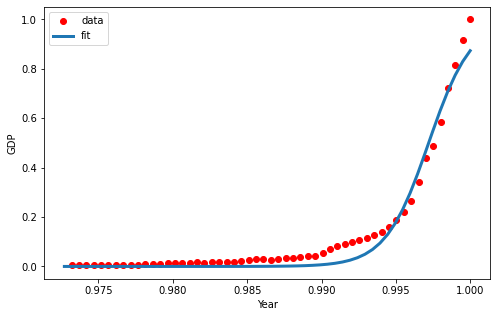

In [34]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Model using Training Set

In [35]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)

## 6. Prediction

In [36]:
y_hat = sigmoid(test_x, *popt)

## 7. Evaluation/Accuracy

Mean Absolute Error (MAE)

0 - ꚙ	Negatively Orientated

$$
MAE = \frac{1}{n} \sum \limits _{i=1} ^{n} |y_i-(\hat{y_i})|
$$

In [37]:
print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(y_hat - test_y)))

Mean Absolute Error (MAE): 0.04


Residual Sum of Squares (RSS)

0 - ꚙ	(Negatively Orientated)
$$
RSS = \sum \limits _{i=1} ^{n} (y_i-(\hat{y_i}))^2
$$

In [38]:
print("Residual Sum of Squares (RSS): %.4f" % np.mean((y_hat - test_y) ** 2))

Residual Sum of Squares (RSS): 0.0023


Coefficient of Determination (R^2 Score)

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

R^2 : Coefficient of Determination

RSS : Residual Sum of Squares

TSS : Total Sum of Squares

In [39]:
print("R2-Score (Coefficient of Determination R^2): %.2f" % r2_score(test_y,y_hat) )

R2-Score (Coefficient of Determination R^2): -0.44
